Version 2023.12.29 - A. Lundervold

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MMIV-ML/ELMED219/blob/main/Lab0-ML/Lab0-GT-and-complex-network-analysis/3-Extensions.ipynb)

# 3. Graph extentions

### Check if Colab

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# as that makes some difference for the code below.
# We'll do this in every notebook of the course.

try:
    import google.colab
    # If this statement executes without error, you're in a Colab environment.
    is_colab = True
    print("Running in Google Colab.")
except ImportError:
    # An ImportError means you're not in a Colab environment.
    is_colab = False
    print("Not running in Google Colab.")

Not running in Google Colab.


Import modules:

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

## 3.1. Directed graphs (Digraph)

Sometimes, the direction of the connections between two nodes are relevant for modelling.

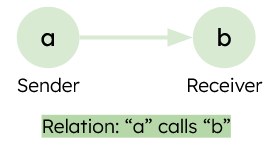

In certain cases, such as modeling a network of people based on phone calls, the direction of the connections becomes significant. We need to distinguish between the caller (sender) and the person answering the call (receiver). If we use undirected networks, this valuable information about who is who is lost. 

To address this, we can utilize directed graphs, where the links have a specific direction or sense.

### 3.1.1. Definition

**Definition**: A directed graph or digraph $D$ consists of a collection of vertices $V$, and a collection of arcs $E$, denoted as $D = (V,E)$. Each arc $e = \langle u, v \rangle$ connects vertex $u \in V$ to another (not necessarily distinct) vertex $v$. The vertex $u$ is called the *origin* of $e$ and $v$ is called the *destination*.

**Example:**

In [3]:
node_labels = [0,1,2,3,4]
edge_labels = [(0, 1), (0,2), (1,2), (2,3), (3,4), (1,3)]
weight = [1, 1, 2, 2, 4, 2]
weighted_edges = [(edge_labels[i][0], edge_labels[i][1], weight[i]) for i in range(len(edge_labels))]

In [4]:
W = nx.Graph()
W.add_nodes_from(node_labels)
W.add_weighted_edges_from(weighted_edges, weight='weight')

Text(0.5, 1.0, '$W$')

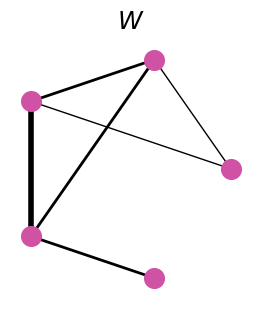

In [5]:
fig, axs = plt.subplots(figsize=(2.5,3), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
pos = nx.layout.circular_layout(W)
nx.draw_networkx_nodes(W, pos, node_color="#cf52a5", linewidths=1, ax=axs, node_size=200)
nx.draw_networkx_edges(W, pos, width=weight, ax=axs)
axs.axis('off')
axs.set_title(r"$W$", fontsize=18)

In [6]:
W.edges.data("weight")

EdgeDataView([(0, 1, 1), (0, 2, 1), (1, 2, 2), (1, 3, 2), (2, 3, 2), (3, 4, 4)])

In [7]:
WA = nx.adjacency_matrix(W, weight='weight').todense()
WA

array([[0, 1, 1, 0, 0],
       [1, 0, 2, 2, 0],
       [1, 2, 0, 2, 0],
       [0, 2, 2, 0, 4],
       [0, 0, 0, 4, 0]])

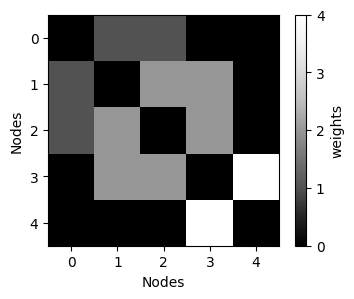

In [8]:
fig, axs = plt.subplots(figsize=(4,3), facecolor='w', nrows=1, ncols=1)
cmap_ = plt.cm.get_cmap('Greys_r')
im = axs.imshow(WA, cmap=cmap_)
cbar = plt.colorbar(im, ax=axs, ticks=[0,1,2,3,4])
cbar.set_label("weights")
axs.set_xlabel("Nodes"); axs.set_ylabel("Nodes");

### 3.1.2. Connectivity in DiGraphs

It is often important to "measure" the distance between one node and another. This is called "Connectivity" of the network.

It is measured for both undirected and directed networks, and consists of finding paths between one node and another. 


**Definition**: Consider a digraph $D$. A directed path-($v_0, v_k$) in $D$ is an alternating sequence $[v_0, a_0, v_1, a_1, a_1, \dots, v_{k-1}, a_{k-1}, v_k]$ of vertices and arcs of $D$ with $\langle \overrightarrow{v_i, v_{i+1}} \rangle$. A *directed path* is a directed walk in which all arcs are distinct; a *directed path* is a directed path in which all vertices are also distinct.

**Example:**

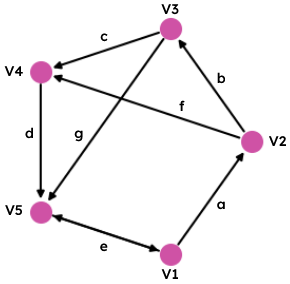


For the previous Graph, what would a path from node `V1` to `V4` look like?

A path can be:

`V1-> a -> V2 -> f -> V4`.

On the other hand, we can also go from `V1` to `V4` as follows:

`V1 -> a -> V2 -> b -> V3 -> c -> V4`.


We will consider this concept of "path" as *node accessibility* in Sub-Chapter 4 as a property of the network.

## 3.2. Weighted graphs

**Definition**: A weighted graph $G$ is a graph where each link $e$ has a real number $w(e)$ associated with it, called *weight. For a subgraph $H \subseteq G$, the weight of $H$ is simply the sum of weights of its links: $w(H) = \sum_{e \in E(H)} w(e)$.

**Example:**

In [9]:
node_labels = [0,1,2,3,4]
edge_labels = [(0, 1), (0,2), (1,2), (2,3), (3,4), (1,3)]
weight = [1, 1, 2, 2, 4, 2]
weighted_edges = [(edge_labels[i][0], edge_labels[i][1], weight[i]) for i in range(len(edge_labels))]

In [10]:
W = nx.Graph()
W.add_nodes_from(node_labels)
W.add_weighted_edges_from(weighted_edges, weight='weight')

Text(0.5, 1.0, '$W$')

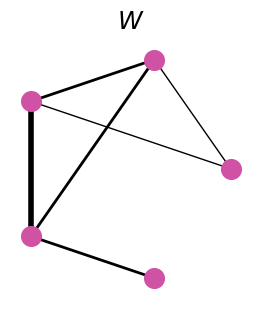

In [11]:
fig, axs = plt.subplots(figsize=(2.5,3), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
pos = nx.layout.circular_layout(W)
nx.draw_networkx_nodes(W, pos, node_color="#cf52a5", linewidths=1, ax=axs, node_size=200)
nx.draw_networkx_edges(W, pos, width=weight, ax=axs)
axs.axis('off')
axs.set_title(r"$W$", fontsize=18)

In [12]:
W.edges.data("weight")

EdgeDataView([(0, 1, 1), (0, 2, 1), (1, 2, 2), (1, 3, 2), (2, 3, 2), (3, 4, 4)])

In [13]:
WA = nx.adjacency_matrix(W, weight='weight').todense()
WA

array([[0, 1, 1, 0, 0],
       [1, 0, 2, 2, 0],
       [1, 2, 0, 2, 0],
       [0, 2, 2, 0, 4],
       [0, 0, 0, 4, 0]])

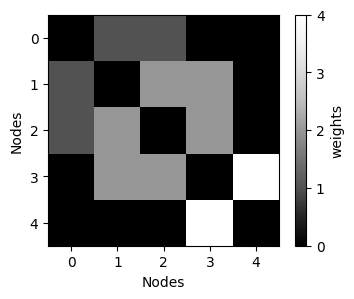

In [14]:
fig, axs = plt.subplots(figsize=(4,3), facecolor='w', nrows=1, ncols=1)
cmap_ = plt.cm.get_cmap('Greys_r')#, 5)
#labels = np.arange(0, 4+1, 1)
im = axs.imshow(WA, cmap=cmap_)#, vmin=0, vmax=4)
cbar = plt.colorbar(im, ax=axs, ticks=[0,1,2,3,4])
cbar.set_label("weights")
axs.set_xlabel("Nodes"); axs.set_ylabel("Nodes");
#loc = labels - 0.5
#cbar.set_ticks(loc)
#cbar.set_ticklabels(labels)

## 3.3. Weighted digraphs

**Definition**: A directed weighted graph $D$ consists of a collection of vertices $V$, a collection of links $E$ and weights $W$, denoted as $D = (V,E,W)$. Each link $e = \langle u, v \rangle$ connects vertex $u \in V$ to another (not necessarily distinct) vertex $v$. The vertex $u$ is called the *origin* of $e$ and $v$ is called the *destination*.

**Example:**

In [15]:
node_labels = [0,1,2,3,4]
edge_labels = [(0, 1), (0,2), (1,2), (2,3), (4,3), (3,4), (1,3), (4,0)]
weight = [1, 1, 2, 2, 4, 2, 1, 2]
weighted_edges = [(edge_labels[i][0], edge_labels[i][1], weight[i]) for i in range(len(edge_labels))]

In [16]:
WD = nx.DiGraph()
WD.add_nodes_from(node_labels)
WD.add_weighted_edges_from(weighted_edges, weight='weight')

Text(0.5, 1.0, '$WD$')

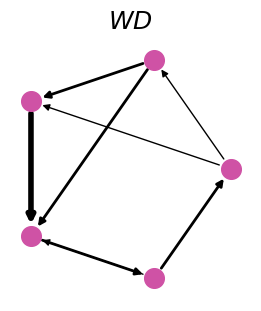

In [17]:
fig, axs = plt.subplots(figsize=(2.5,3), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
pos = nx.layout.circular_layout(WD)
nx.draw_networkx_nodes(WD, pos, node_color="#cf52a5", linewidths=1, ax=axs, node_size=200)
nx.draw_networkx_edges(WD, pos, width=weight, ax=axs)
axs.axis('off')
axs.set_title(r"$WD$", fontsize=18)

## 3.4. Bipartite Graph

### 3.4.1. Definition

A bipartite graph can be defined as a graph whose vertices $V$ can be partitioned into two sets, $V_1$ and $V_2$,disjoint and non-empty, such that each link $E$ connects a vertex of $V_1$ to $V_2$. Formally it can be expressed as:

$$
G = (V_1 \cup V_2, E)
$$

Where $V_1 \cap V_2 = \emptyset$ (i.e., $V_1$ and $V_2$ are disjoint) and for each $u,v \in E$, $u \in V_1$ and $v \in V_2$.

In [18]:
list_artists_names = [
    'Slow Joy', #0
    'La ciencia simple', #1
    'Origami Angel', #2 
    'Jeff Rosenstock', #3 
    'Millencolin', #4
    'NoFX', #5
    ]
list_artists_names

['Slow Joy',
 'La ciencia simple',
 'Origami Angel',
 'Jeff Rosenstock',
 'Millencolin',
 'NoFX']

In [19]:
users_and_artists = {
    0 : [0, 1, 2],
    1 : [2, 3],
    2 : [4, 5],
    3 : [2, 4, 5]
    }

In [20]:
list_users = list(users_and_artists.keys())
list_users

[0, 1, 2, 3]

In [21]:
list_artists = list(users_and_artists.values())
list_artists

[[0, 1, 2], [2, 3], [4, 5], [2, 4, 5]]

In [22]:
list_artists = list(users_and_artists.values())
print(list_artists)
list_artists = np.unique(np.concatenate(list_artists))
list_artists

[[0, 1, 2], [2, 3], [4, 5], [2, 4, 5]]


array([0, 1, 2, 3, 4, 5])

In [23]:
U = len(list_users)
A = len(list_artists)
print("U = %i A = %i" % (U, A))

U = 4 A = 6


In [24]:
conn_matrix = np.zeros(shape=(U,A))
conn_matrix

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [25]:
users_and_artists[1]

[2, 3]

In [26]:
for i_u in range(U):
  print(users_and_artists[i_u])
  #for l_artists in users_and_artists[i_u]:
  #  print(l_artists)
  conn_matrix[i_u, users_and_artists[i_u]] = 1

[0, 1, 2]
[2, 3]
[4, 5]
[2, 4, 5]


In [27]:
conn_matrix

array([[1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 1., 1.]])

#### 2.4.2.1.  Graph of user connectied by artists  

In [28]:
conn_matrix[0,:]

array([1., 1., 1., 0., 0., 0.])

In [29]:
conn_matrix[1,:]

array([0., 0., 1., 1., 0., 0.])

In [30]:
users_mat = np.zeros(shape=(U,U))
for i in range(U):
  for j in range(i+1, U):
    if np.sum(conn_matrix[i,:]*conn_matrix[j,:])>0:
      users_mat[i,j] = np.sum(conn_matrix[i,:]*conn_matrix[j,:]) # 1
    users_mat[j,i] = users_mat[i,j]

In [31]:
users_mat

array([[0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 0., 0., 2.],
       [1., 1., 2., 0.]])

In [32]:
G_users = nx.Graph(users_mat)

In [33]:
labels = nx.get_edge_attributes(G_users,'weight')

Text(0.5, 1.0, '$Graph\\ (Users)$')

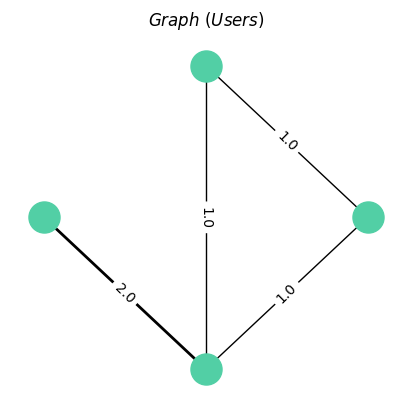

In [34]:
fig, axs = plt.subplots(figsize=(4,4), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
pos = nx.layout.circular_layout(G_users)
nx.draw_networkx_nodes(G_users, pos, node_color="#52cfa5", linewidths=1, ax=axs, node_size=500)
nx.draw_networkx_edges(G_users, pos, width=list(labels.values()), ax=axs)
nx.draw_networkx_edge_labels(G_users,pos=pos,edge_labels=labels)
axs.axis('off')
axs.set_title(r"$Graph\ (Users)$", fontsize=12)

#### 2.4.2.2. Graph of artists connected by users

In [35]:
artists_mat = np.zeros(shape=(A,A))
for i in range(A):
  for j in range(i+1, A):
    if np.sum(conn_matrix[:,i]*conn_matrix[:,j])>0:
      artists_mat[i,j] = np.sum(conn_matrix[:,i]*conn_matrix[:,j])
      artists_mat[j,i] = artists_mat[i,j]

In [36]:
artists_mat

array([[0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 2.],
       [0., 0., 1., 0., 2., 0.]])

In [37]:
G_artists = nx.Graph(artists_mat)

In [38]:
labels = nx.get_edge_attributes(G_artists,'weight')

In [39]:
labels

{(0, 1): 1.0,
 (0, 2): 1.0,
 (1, 2): 1.0,
 (2, 3): 1.0,
 (2, 4): 1.0,
 (2, 5): 1.0,
 (4, 5): 2.0}

In [40]:
labels = nx.get_edge_attributes(G_artists, "weight")

In [41]:
list(labels.values())

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0]

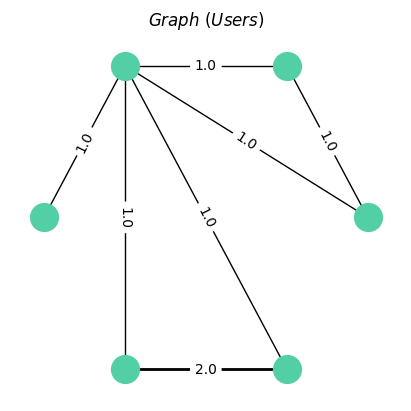

In [42]:
fig, axs = plt.subplots(figsize=(4,4), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
pos = nx.layout.circular_layout(G_artists)
nx.draw_networkx_nodes(G_artists, pos, node_color="#52cfa5", linewidths=1, ax=axs, node_size=400)
nx.draw_networkx_edges(G_artists, pos, width=list(labels.values()), ax=axs)
nx.draw_networkx_edge_labels(G_artists,pos=pos,edge_labels=labels)
axs.axis('off')
_ = axs.set_title(r"$Graph\ (Users)$", fontsize=12)

### 3.4.2. Other applications

Bipartite graphs find application in a wide range of diverse fields. For instance,

+ Recommendation systems.
+ Social network analysis.
+ Matching problems.
+ Data integration.
+ Biology and genetics.
+ Transport problems.
+ Citation analysis.

## References 


1. Maarten van Steen (2010). Graph Theory and Complex Networks. An Introduction (Book).
1. Newman, M. (2010). Networks: An Introduction (Book).
Robin J. Wilson (1996). Introduction to Graph Theory (eBook: https://www.maths.ed.ac.uk/~v1ranick/papers/wilsongraph.pdf).

---